In [82]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib 
from matplotlib import pyplot as plt
import keras

In [83]:
#TRAINING THE DATASET

In [84]:
#Importing Dataset

In [85]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# read the csv
cleveland = pd.read_csv(url, names=names)

In [86]:
# print the shape of the DataFrame, so we can see how many examples we have
print ('Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          67.0
sex           1.0
cp            4.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       2.0
thalach     108.0
exang         1.0
oldpeak       1.5
slope         2.0
ca            3.0
thal          3.0
class           2
Name: 1, dtype: object


In [87]:
# print the last twenty or so data points
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [88]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [89]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [90]:
# print the shape and data type of the dataframe
print (data.shape)
print (data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [91]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [92]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


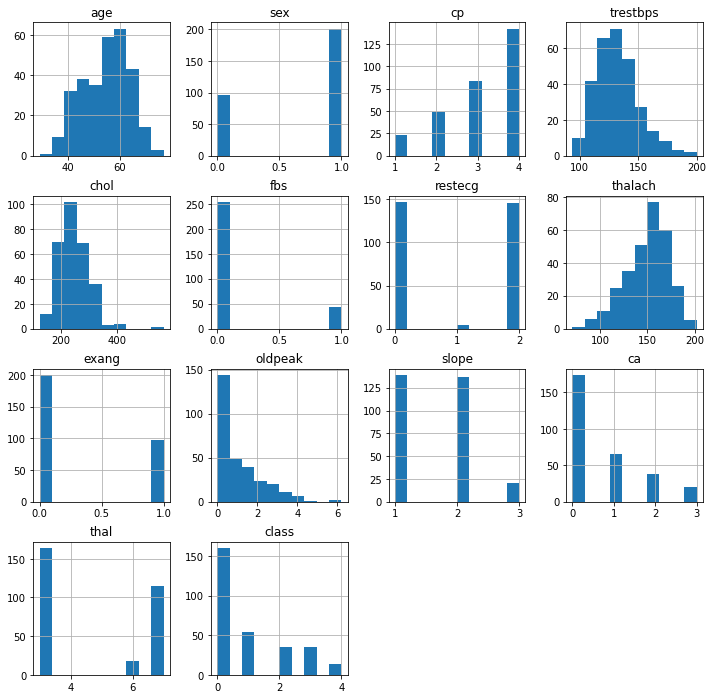

In [93]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

In [94]:
#CREATING TRAINING AND TESTING DATASETS

In [95]:
# creating X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(labels=['class'], axis=1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [96]:
# converting the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print(Y_train.shape)
print(Y_train[:10])

(237, 5)
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [97]:
# BUILDING AND TRAINING THE NEURAL NETWORK

In [98]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def create_model():
    # creating model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 112       
                                                                 
 dense_19 (Dense)            (None, 4)                 36        
                                                                 
 dense_20 (Dense)            (None, 5)                 25        
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
# fiting the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 1.4511 - accuracy: 0.4937
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3661 - accuracy: 0.5105
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3234 - accuracy: 0.5148
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3034 - accuracy: 0.5148
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2917 - accuracy: 0.5148
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2938 - accuracy: 0.5148
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2951 - accuracy: 0.5148
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2910 - accuracy: 0.5190
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2851 - accuracy: 0.5148
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2771 - accuracy: 0.5148
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.9636 - accuracy: 0.5907
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9691 - accuracy: 0.5781
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9787 - accuracy: 0.5738
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9764 - accuracy: 0.5738
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9575 - accuracy: 0.5738
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9576 - accuracy: 0.6034
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9675 - accuracy: 0.6034
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9609 - accuracy: 0.5823
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9547 - accuracy: 0.5907
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9514 - accuracy: 0.5949
Epoch 93/100


In [100]:
# IMPROVING RESULTS

In [101]:
'''

Although we achieved promising results, we still have a fairly large error. 
This could be because it is very difficult to distinguish between the different severity levels of heart disease 
(classes 1 - 4). 
Thus, we'll be simplifying the problem by converting the data to a binary classification problem - 
heart disease or no heart disease.

'''

"\n\nAlthough we achieved promising results, we still have a fairly large error. \nThis could be because it is very difficult to distinguish between the different severity levels of heart disease \n(classes 1 - 4). \nThus, we'll be simplifying the problem by converting the data to a binary classification problem - \nheart disease or no heart disease.\n\n"

In [102]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1]


In [103]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 112       
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [104]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.7032 - accuracy: 0.4852
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5443
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.5907
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.6456
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5696
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5654
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.7089
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.5570
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.6962
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.6329
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8565
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.8439
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4181 - accuracy: 0.8228
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4181 - accuracy: 0.8481
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4048 - accuracy: 0.8523
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4033 - accuracy: 0.8565
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8439
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8481
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4024 - accuracy: 0.8481
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4076 - accuracy: 0.8565
Epoch 93/100


In [105]:
# PERFORMANCE METRICS

In [106]:
#Makeing predictions on the training dataset and calculate performance metrics using Sklearn.

In [107]:
# generating classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred, zero_division=1))

2/2 [==============================] - 0s 5ms/step
Results for Categorical Model
0.6333333333333333
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        38
           1       0.00      0.00      0.00         7
           2       0.23      0.50      0.32         6
           3       1.00      0.00      0.00         6
           4       1.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.61      0.28      0.23        60
weighted avg       0.68      0.63      0.57        60



In [108]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 [==============================] - 0s 5ms/step
Results for Binary Model
0.8666666666666667
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        38
           1       0.85      0.77      0.81        22

    accuracy                           0.87        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.87      0.87      0.87        60

